## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [3]:
def sample_cards(N, n, k, with_replacement=False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=with_replacement)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [4]:
cards = sample_cards(100, 6, 3)
cards

array([[23, 63, 79],
       [39, 76, 91],
       [ 1, 49, 82],
       [13, 15, 69],
       [11, 25, 29],
       [31, 80, 87]])

and access the cards of each player with 

In [5]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([23, 63, 79]), array([39, 76, 91]))

The lowest card in the game is

In [6]:
np.min(cards)

1

In [7]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

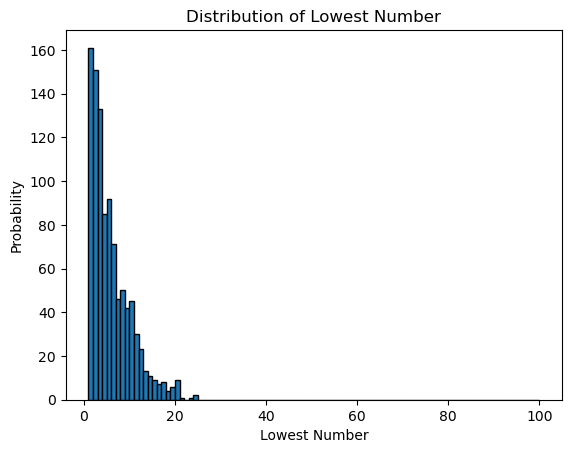

In [34]:
lowest_numbers = []
num_samples = 10000  # Number of times to sample the cards

N = 100
n = 6
k = 3

cards = sample_cards(N, n, k)

num_samples = 1000

for _ in range(num_samples):
    cards = sample_cards(N, n, k)
    lowest_number = np.min(cards)  # Finding the lowest number in the sample
    lowest_numbers.append(lowest_number)  # Adding the lowest number to the list.
    
plt.hist(lowest_numbers, bins=np.arange(1, N+1), edgecolor='k')
plt.xlabel("Lowest Number")
plt.ylabel("Probability")
plt.title("Distribution of Lowest Number")
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

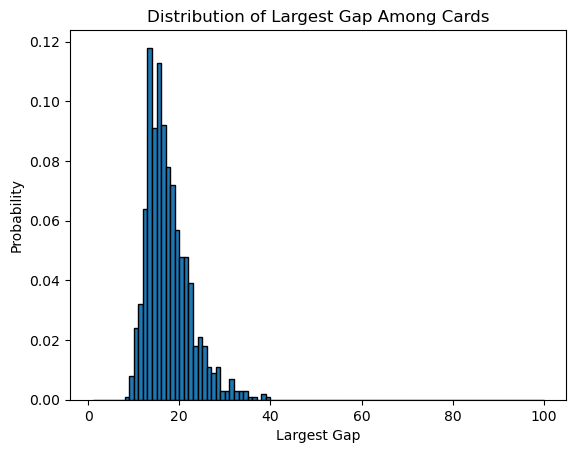

In [44]:
def calculate_largest_gap(cards):
    
    sorted_cards = np.sort(cards)
    consecutive_diff = np.diff(sorted_cards)
    largest_gap = np.max(consecutive_diff)
    return largest_gap

def simulate_and_plot_largest_gap(N, n, k, num_simulations):
    
    largest_gaps = []

    for _ in range(num_simulations):
        cards = sample_cards(N, n, k)
        largest_gap = calculate_largest_gap(cards.flatten())
        largest_gaps.append(largest_gap)

    # Plot the distribution of largest gaps
    plt.hist(largest_gaps, bins=np.arange(1, N + 1), density=True, edgecolor='k')
    plt.xlabel("Largest Gap")
    plt.ylabel("Probability")
    plt.title("Distribution of Largest Gap Among Cards")
    plt.show()

# Specify the values for N, n, and k
N = 100  # Total number of cards
n = 6    # Number of players
k = 3    # Number of cards per player

# Number of times to simulate
num_simulations = 1000

# Call the function to simulate and plot the distribution of the largest gap
simulate_and_plot_largest_gap(N, n, k, num_simulations)



Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

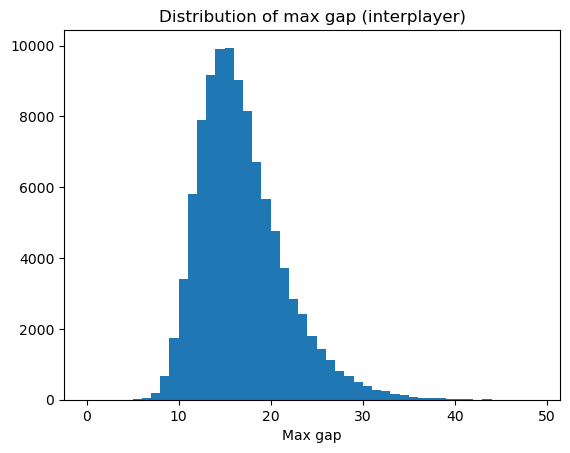

mean = 16.40061


In [45]:
def create_card_player_tuples(n, cards):
    cards_tuple = []
    for p in np.arange(n):
        player_cards = cards[p]
        for c in player_cards:
            tup = (c,p)
            cards_tuple.append(tup)
    cards_tuple.sort()
    return cards_tuple

def get_max_interplayer_gap(cards_tuple):
    gaps = []
    for i in np.arange(1, len(cards_tuple)):
        gap = cards_tuple[i][0] - cards_tuple[i-1][0]
        if cards_tuple[i][1] != cards_tuple[i-1][1]:
            gaps.append(gap)

    return np.max(gaps)

def run_simulation_max_interplayer_gap(num_iter, N, n, k):
    max_interplayer_gaps = []

    for i in np.arange(num_iter):
        cards = sample_cards(N, n, k)
        card_player_tuples = create_card_player_tuples(n, cards)
        max_gap = get_max_interplayer_gap(card_player_tuples)
        max_interplayer_gaps.append(max_gap)
    return max_interplayer_gaps
## run simulation
num_iter = 100000
max_interplayer_gap_list = run_simulation_max_interplayer_gap(num_iter, N, n, k)


## plot results
plt.hist(max_interplayer_gap_list, bins = np.arange(0,50))
plt.xlabel('Max gap')
plt.title('Distribution of max gap (interplayer)')
plt.show()
print("mean =", np.mean(max_interplayer_gap_list))

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

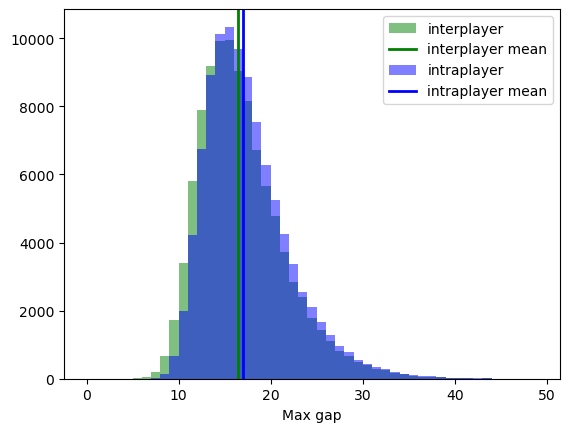

In [46]:
## compare inter-player and intra-player gaps
plt.hist(max_interplayer_gap_list,  alpha = 0.5, color='green', bins = np.arange(0,50), label = 'interplayer')
plt.axvline(x=np.mean(max_interplayer_gap_list), color='green', linewidth=2, label='interplayer mean')

plt.hist(max_gap_list, alpha = 0.5, bins = np.arange(0,50), color='blue', label = 'intraplayer')
plt.axvline(x=np.mean(max_gap_list), color='blue', linewidth=2, label='intraplayer mean')

plt.xlabel('Max gap')
plt.legend()
plt.show()


In [47]:
## creating a table of the different variations

def get_mean_diffs(n_players_list, k_cards_list, num_iter = 10000):
    n_dict = {}
    for n in n_players_list:
        n_results_list = []

        for k in k_cards_list:
            max_gap_list = run_simulation_max_gap(num_iter, N, n, k)
            max_interplayer_gap_list = run_simulation_max_interplayer_gap(num_iter, N, n, k)
            diff_mean = np.mean(max_gap_list) - np.mean(max_interplayer_gap_list)
            n_results_list.append(diff_mean)

        n_dict[n] = n_results_list
    return n_dict


## show results in df
n_players_list = [2, 4, 6, 8]
k_cards_list = [3, 5, 7, 9]

n_dict = get_mean_diffs(n_players_list, k_cards_list)
df = pd.DataFrame(n_dict)
df.columns = ['n=%i' %i for i in n_players_list]
df.index = ['k=%i' %i for i in k_cards_list]

df

,n=2,n=4,n=6,n=8
k=3,7.3472,1.3107,0.6048,0.2686
k=5,5.1375,0.9261,0.4200,0.2255
k=7,3.8054,0.7378,0.2723,0.1121
k=9,3.1190,0.5077,0.2360,0.0812


### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

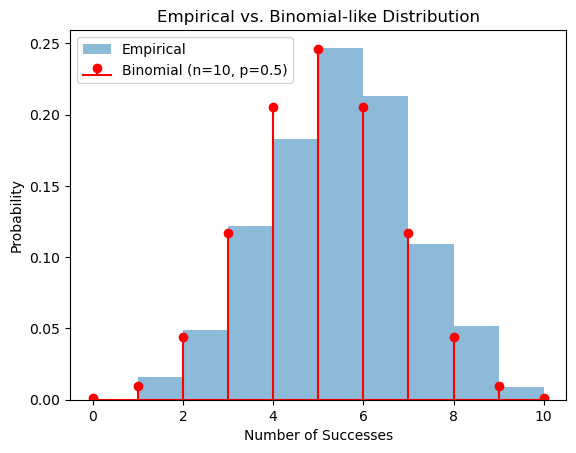

In [48]:
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats import beta

random.seed(10)


# Define parameters
n_simulations = 1000  # Number of simulations
n_trials = 10  # Number of trials (corresponds to rounds in the game)
p_success = 0.5  # Probability of success in each trial

# Simulate the trials and record successes
successes = []

for _ in range(n_simulations):
    trial_results = np.random.choice([0, 1], size=n_trials, p=[1 - p_success, p_success])
    total_successes = np.sum(trial_results)
    successes.append(total_successes)

# Plot the empirical distribution
plt.hist(successes, bins=np.arange(0, n_trials + 1), density=True, alpha=0.5, label="Empirical")

# Calculate and plot the binomial distribution
x = np.arange(0, n_trials + 1)
pmf = binom.pmf(x, n_trials, p_success)
plt.stem(x, pmf, linefmt='r-', markerfmt='ro', basefmt='r-', label="Binomial (n={}, p={})".format(n_trials, p_success))

plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.title("Empirical vs. Binomial-like Distribution")
plt.legend()
plt.show()

### 3.2. Beta Distribution
The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

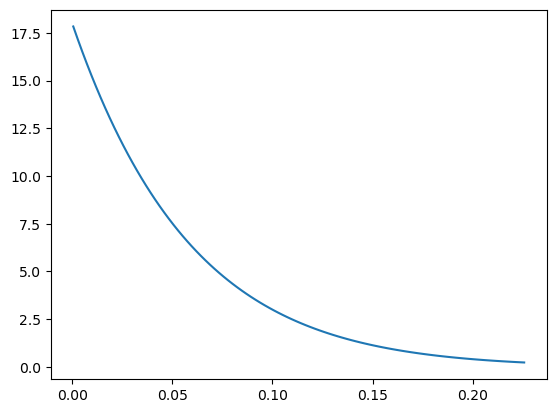

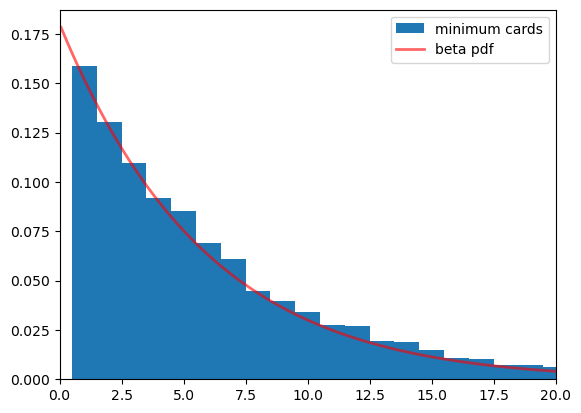

In [49]:
## get beta distribution pdf
a = 1
b = 18 + 1 - a

x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
beta_pdf = beta.pdf(x, a, b)
plt.plot(x, beta_pdf, label = 'beta distribution')
plt.show()


## Compare histogram with beta pdf
plt.hist(lowest_cards, bins = np.arange(0.5, 100.5, 1.0), density=True, label='minimum cards')

plt.plot(x*100, beta_pdf/100,
       'r-', lw=2, alpha=0.6, label='beta pdf')

plt.xlim(0,20)
plt.legend()
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

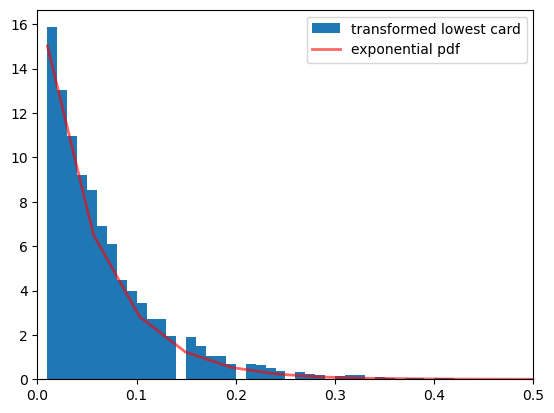

In [50]:
## calculate transformed variable
transformed_rv = -np.log(1-(np.array(lowest_cards)/100))
## get exponential pdf 
lambda_param = 18
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
expon_pdf = expon.pdf(x, scale=1/lambda_param)
## plot empirical results vs. exponential pdf
plt.hist(transformed_rv, bins=np.arange(0, 0.5, 0.01), density=True, label='transformed lowest card')
plt.plot(x, expon_pdf,'r-', lw=2, alpha=0.6, label='exponential pdf')

plt.xlim((0,0.5))
plt.legend()
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

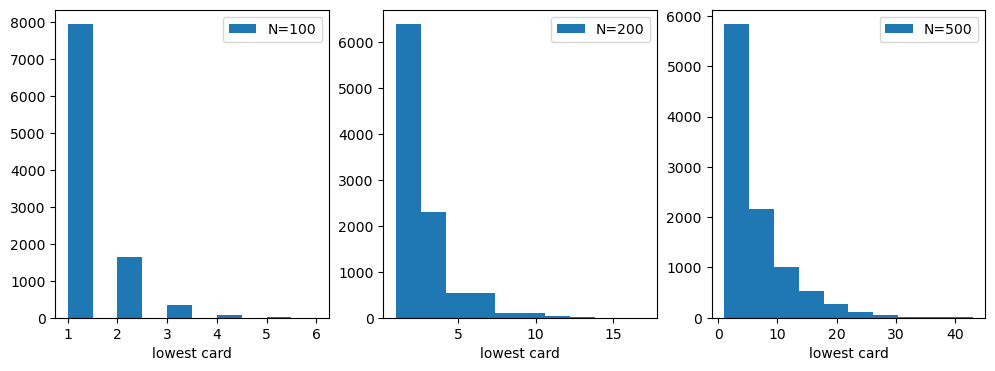

In [51]:
## What happens if we increase the num of cards per player? Look at lowest card distribution
num_iter = 10000
N_list = [100, 200, 500]
n = 8
k = 10

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

for i in np.arange(len(N_list)):
    N = N_list[i]
    lowest_cards = get_lowest_cards(num_iter, N, n, k)
    ax = axes[i]
    ax.hist(lowest_cards, label='N={}'.format(N))
    ax.set_xlabel('lowest card')
    ax.legend()

plt.show()

In [52]:
# as we increase N, the distribution of the lowest card looks closer to a beta distribution
# In order to compare what happens with vs. without replacement, we'll look at two different scenarios:
# Senario 1: n*k << N
# Senario 2: n*k ~ N

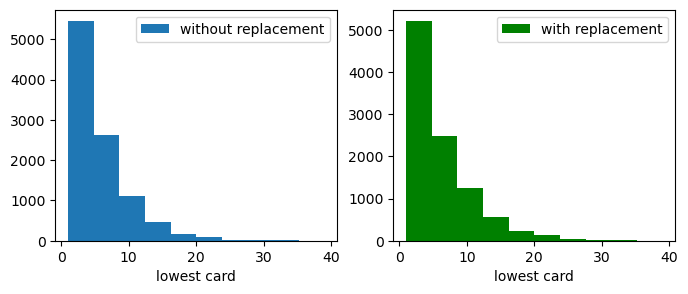

In [53]:
## Scenario 1: n*k << N
num_iter = 10000
N = 100
n = 6
k = 3

lowest_cards_without_replace = get_lowest_cards(num_iter, N, n, k)
lowest_cards_with_replace = get_lowest_cards(num_iter, N, n, k, with_replacement=True)
## plot scenario 1 comparison
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes = axes.flatten()

axes[0].hist(lowest_cards_without_replace, label='without replacement')
axes[0].set_xlabel('lowest card')
axes[0].legend()

axes[1].hist(lowest_cards_with_replace, color='green', label='with replacement')
axes[1].set_xlabel('lowest card')
axes[1].legend()

plt.show()

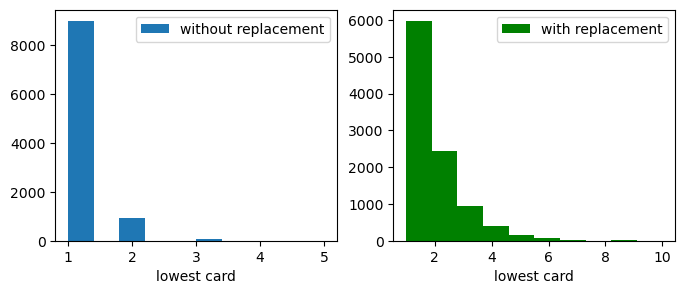

In [54]:
## Scenario 2: n*k ~ N
num_iter = 10000
N = 100
n = 9
k = 10

lowest_cards_without_replace = get_lowest_cards(num_iter, N, n, k)
lowest_cards_with_replace = get_lowest_cards(num_iter, N, n, k, with_replacement=True)
## plot scenario 2 comparison
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes = axes.flatten()

axes[0].hist(lowest_cards_without_replace, label='without replacement')
axes[0].set_xlabel('lowest card')
axes[0].legend()

axes[1].hist(lowest_cards_with_replace, color='green', label='with replacement')
axes[1].set_xlabel('lowest card')
axes[1].legend()

plt.show()

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: 
- Member No2: 
- Member No3: